## Tarea 8.1

Tome 20 puntos entre $x = -2$ y $x = 2$ para interpolar la función $\tanh(x)$. Hágalo usando la spline cúbica introducida en clase y la función de scipy. ¿Cuál tiene un error mayor?

In [1]:
#Se importan los paquetes a utilizar
import numpy as np
import matplotlib.pyplot as plt

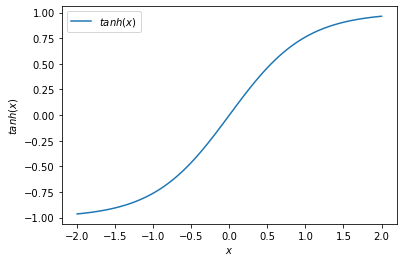

In [2]:
#Gráfica se la función tanh(x)
x=np.linspace(-2, 2, 100)
plt.plot(x, np.tanh(x), label='$tanh(x)$')
plt.xlabel('$x$')
plt.ylabel('$tanh(x)$')
plt.legend()
plt.show()

## Spline cúbica

In [3]:
#Definición de los coeficientes para la interpolación Spline
def spline_coefs(puntos):
    
    n = len(puntos) - 1
    
    h = np.zeros(n)
    for i in range(n):
        h[i] = puntos[i + 1][0] - puntos[i][0]
    
    a = puntos[:,1]
    alpha = np.zeros(n - 1)
    for i in range(1, n):
        alpha[i-1] = (3/h[i])*(a[i+1] - a[i]) - (3/h[i-1])*(a[i] - a[i-1])
        
        
    # Se resuelve un sistema de ecuaciones:
    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    for i in range(1, n):
        l[i] = 2*(puntos[i+1][0] - puntos[i-1][0]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i-1] - h[i-1]*z[i-1])/l[i]
    b = np.zeros(n)
    c = np.zeros(n+1)
    d = np.zeros(n)
    for j in range(n-1,-1,-1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])
        
    return a, b, c, d

In [4]:
#Función que localiza puntos en sus polinomios respectivos
def find_ind(x, puntos):
    for i in range(len(puntos)):
        if x < puntos[i,0] and i != 0:
            return i-1

#Definición de la interpolación Spline
def spline_eval(x, coefs, puntos):

    if x >= puntos[-1,0]:
        return puntos[-1,1]
    elif x <= puntos[0,0]:
        return puntos[0,1]
    
    i = find_ind(x, puntos)
    a, b, c, d = coefs
    return (a[i] + b[i]*(x - puntos[i][0]) + \
            c[i]*(x - puntos[i][0])**2 + d[i]*(x - puntos[i][0])**3)

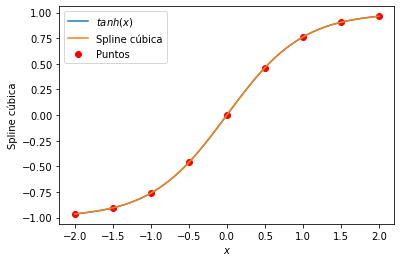

In [5]:
mini = -2 #Valor mínimo de los puntos a evaluar
maxi = 2 #Valor máximo de los puntos a evaluar
order = 9 #Cantidad de puntos usados para interpolar

#Definición de los coeficientes a usar
xp = np.linspace(mini, maxi, order)
puntos = np.array([[xi, np.tanh(xi)] for xi in xp])
coefs= spline_coefs(puntos)

#Definición Spline con los coeficientes
x = np.linspace(mini, maxi, 100)
exact = np.tanh(x)
spline = [spline_eval(xi, coefs, puntos) for xi in x]

#Gráfica conjunta de tanh(x) y Spline
plt.scatter(puntos[:,0], puntos[:,1], color='red', label='Puntos')
plt.plot(x, exact, label='$tanh(x)$')
plt.plot(x, spline, label='Spline cúbica')
plt.ylabel('Spline cúbica')
plt.xlabel('$x$')
plt.legend()
plt.show()

## Scipy

In [6]:
#Importación del paquete a usar de Scipy
from scipy.interpolate import interp1d

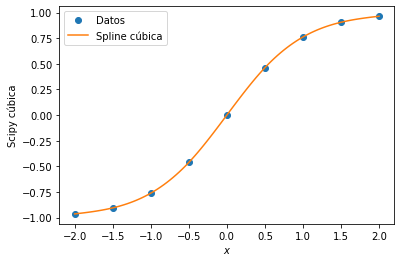

In [7]:
#Datos a usar para la aproximación
x = np.linspace(-2, 2, num=9, endpoint=True)
y = np.tanh(x)
f = interp1d(x, y, kind='cubic')
xnew = np.linspace(-2, 2, num=100, endpoint=True)

#Gráfica conjunta entre el método Scipy cubico y tanh(x)
plt.plot(x, y, 'o', xnew, f(xnew))
plt.legend(['Datos', 'Spline cúbica'], loc='best')
plt.ylabel('Scipy cúbica')
plt.xlabel('$x$')
plt.show()

Se observa que ambas interpolaciones hacen un excelente trabajo al aproximar la función $tanh(x)$ entre $x=-2$ y $x=2$.
Para ver cuál hace un mejor trabajo, se verá cuál tiene mayor error al momento de graficar.

## Errores

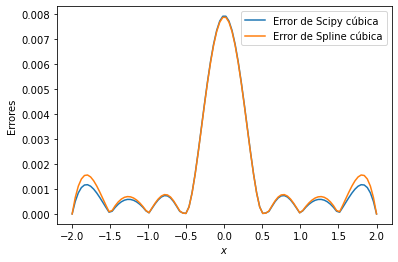

In [8]:
#Datos a usar
x=np.linspace(-2, 2, 100)

#Gráfica de ambos errores a la vez
#Esto es hace para ver mejor la diferencia entre ambas
plt.plot(x, abs(np.tanh(x)-f(xnew))/abs(np.tanh(x)), label='Error de Scipy cúbica')
plt.plot(x, abs(np.tanh(x)-spline)/abs(np.tanh(x)), label='Error de Spline cúbica')
plt.ylabel('Errores')
plt.xlabel('$x$')
plt.legend()
plt.show()

Como se puede apreciar, el error de la interpolación Spline cúbica tiende a ser mayor en los bordes de los datos usados. 
Ahora se verá cuál en promedio tiene mayor error en los datos.

In [9]:
#Error promedio de la interpolación con Scipy
error_scipy = abs(np.tanh(x)-f(xnew))/abs(np.tanh(x))
np.mean(error_scipy)

0.0014585830372849276

In [10]:
#Error promedio de la interpolación con Spline
error_spline = abs(np.tanh(x)-spline)/abs(np.tanh(x))
np.mean(error_spline)

0.001534884752441303

In [11]:
#Diferencia entre ambas cantidades
abs(np.mean(error_spline)-np.mean(error_scipy))

7.63017151563755e-05

Finalmente se observa que en efecto el uso de Scipy es mejor, ya que este tiene un error menor al Spline cúbico; ahora bien, la diferencia es mínima utilizando tan solo $9$ puntos, esta diferencia es $\approx 7.6 x 10^{-5}$. Por ende la interpolación con Spline cúbico tiene un error mayor.

# Calificación: 7.0